In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('dataset_german_credit_data.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape

(1000, 11)

In [5]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
df.Job.value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

<AxesSubplot:>

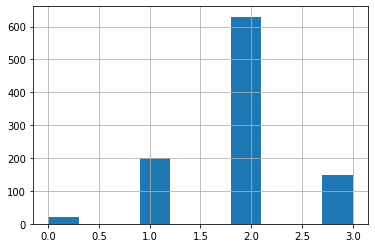

In [9]:
df.Job.hist()

In [10]:
df.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

<AxesSubplot:>

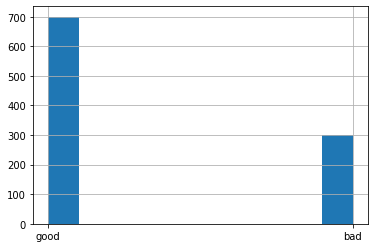

In [11]:
df.Risk.hist()

In [12]:
df.Housing.value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

<AxesSubplot:>

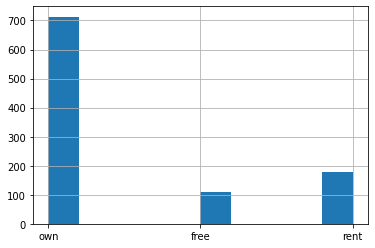

In [13]:
df.Housing.hist()

In [14]:
df.Purpose.value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

<AxesSubplot:>

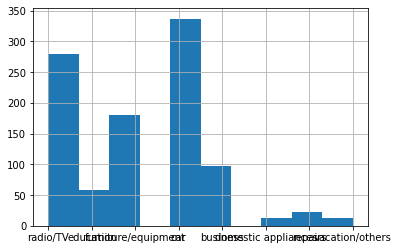

In [15]:
df.Purpose.hist()

<AxesSubplot:>

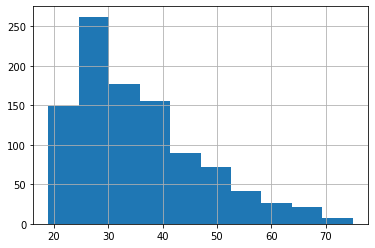

In [16]:
df.Age.hist()

In [17]:
df= df.fillna('unknown')

In [18]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [19]:
j = {0: 'unskilled and non-res', 1: 'unskilled and res', 2: 'skilled', 3: 'highly skilled'}
df['Job_Desc'] = df['Job'].map(j)

In [20]:
df = df.drop(['Unnamed: 0'], axis =1)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Job_Desc
0,67,male,2,own,unknown,little,1169,6,radio/TV,good,skilled
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,skilled
2,49,male,1,own,little,unknown,2096,12,education,good,unskilled and res
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,skilled
4,53,male,2,free,little,little,4870,24,car,bad,skilled
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good,unskilled and res
996,40,male,3,own,little,little,3857,30,car,good,highly skilled
997,38,male,2,own,little,unknown,804,12,radio/TV,good,skilled
998,23,male,2,free,little,little,1845,45,radio/TV,bad,skilled


In [21]:
pd.pivot_table(df, index = 'Risk', columns = 'Sex', values = 'Job', aggfunc = 'count')

Sex,female,male
Risk,,
bad,109,191
good,201,499


In [22]:
pd.pivot_table(df, index = 'Job_Desc', columns = 'Sex', values = 'Risk', aggfunc = 'count')

Sex,female,male
Job_Desc,,
highly skilled,37,111
skilled,197,433
unskilled and non-res,12,10
unskilled and res,64,136


In [23]:
pd.pivot_table(df, index = 'Job_Desc', columns = 'Risk', values = 'Sex', aggfunc = 'count')

Risk,bad,good
Job_Desc,,
highly skilled,51,97
skilled,186,444
unskilled and non-res,7,15
unskilled and res,56,144


In [24]:
pd.pivot_table(df, index = 'Housing', columns = 'Risk', values = 'Sex', aggfunc = 'count')

Risk,bad,good
Housing,,
free,44,64
own,186,527
rent,70,109


In [25]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Job_Desc'],
      dtype='object')

In [26]:
df_cat = df[['Housing','Job_Desc','Sex','Saving accounts','Checking account','Purpose', 'Risk']]

graph for Housing: total = 3


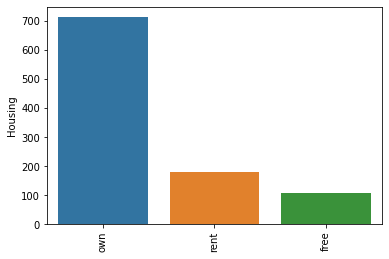

graph for Job_Desc: total = 4


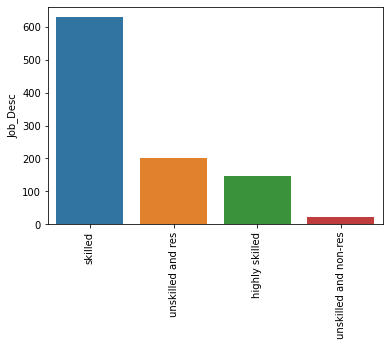

graph for Sex: total = 2


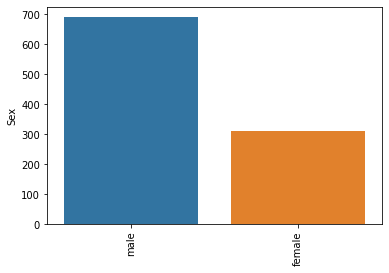

graph for Saving accounts: total = 5


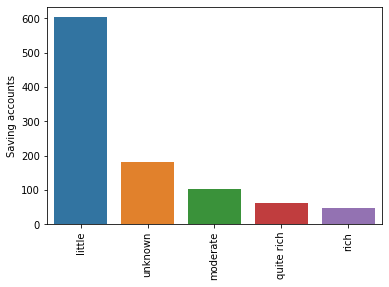

graph for Checking account: total = 4


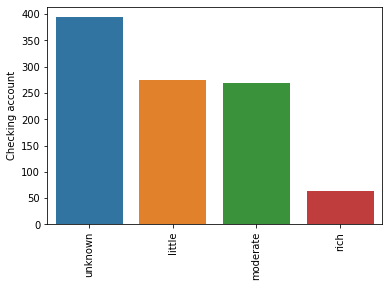

graph for Purpose: total = 8


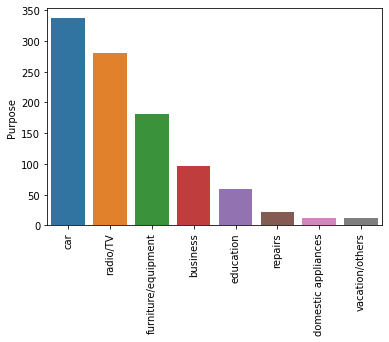

graph for Risk: total = 2


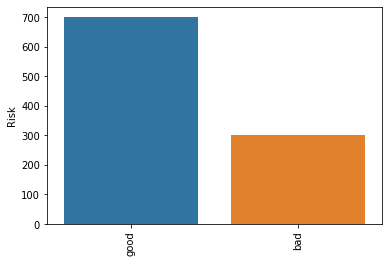

In [27]:
#it will give us bar chart of above defined categories and their value counts in every graph
#so this will be informative
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

<AxesSubplot:xlabel='Housing', ylabel='count'>

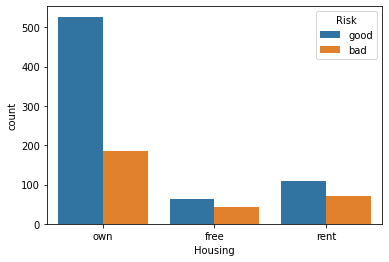

In [28]:
sns.countplot(x="Housing", hue="Risk", data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

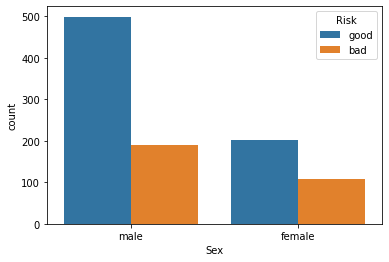

In [29]:
sns.countplot(x="Sex", hue="Risk", data=df)

<AxesSubplot:xlabel='Risk', ylabel='count'>

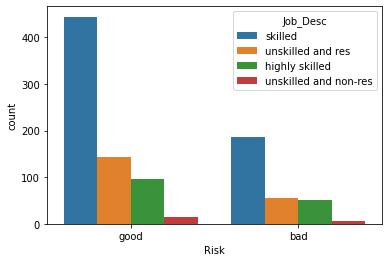

In [30]:
sns.countplot(x="Risk", hue="Job_Desc", data=df)

<AxesSubplot:xlabel='Risk', ylabel='count'>

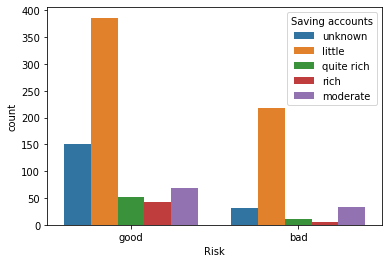

In [31]:
sns.countplot(x="Risk", hue="Saving accounts", data=df)

<AxesSubplot:xlabel='Risk', ylabel='count'>

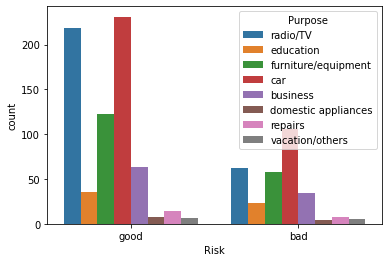

In [32]:
sns.countplot(x="Risk", hue="Purpose", data=df)

[Text(0, 0, 'little'),
 Text(1, 0, 'moderate'),
 Text(2, 0, 'unknown'),
 Text(3, 0, 'rich')]

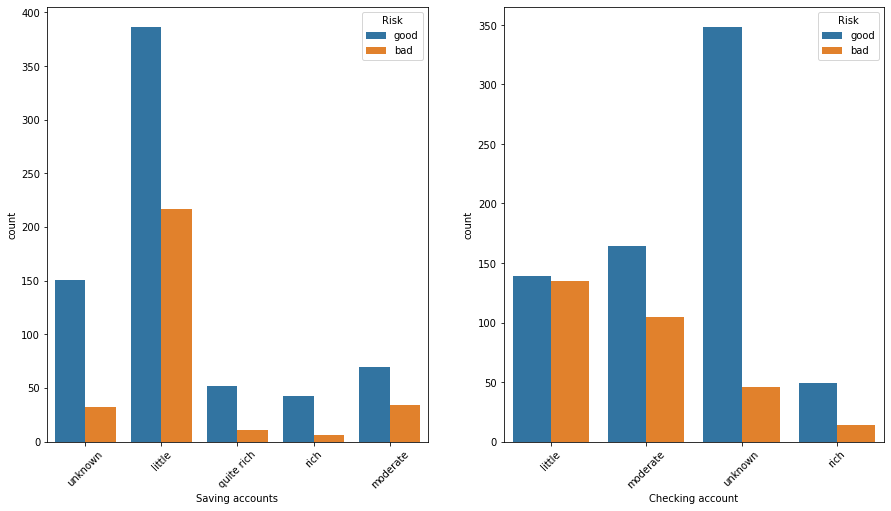

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x="Saving accounts", hue="Risk", data=df, ax=ax1)
sns.countplot(x="Checking account", hue="Risk", data=df, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

In [34]:
df[['Age', 'Credit amount', 'Duration']].corr()

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


<AxesSubplot:>

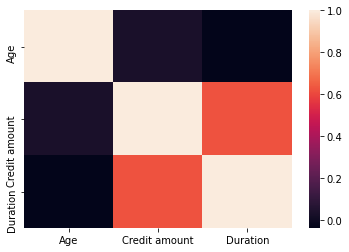

In [35]:
sns.heatmap(df[['Age', 'Credit amount', 'Duration']].corr())

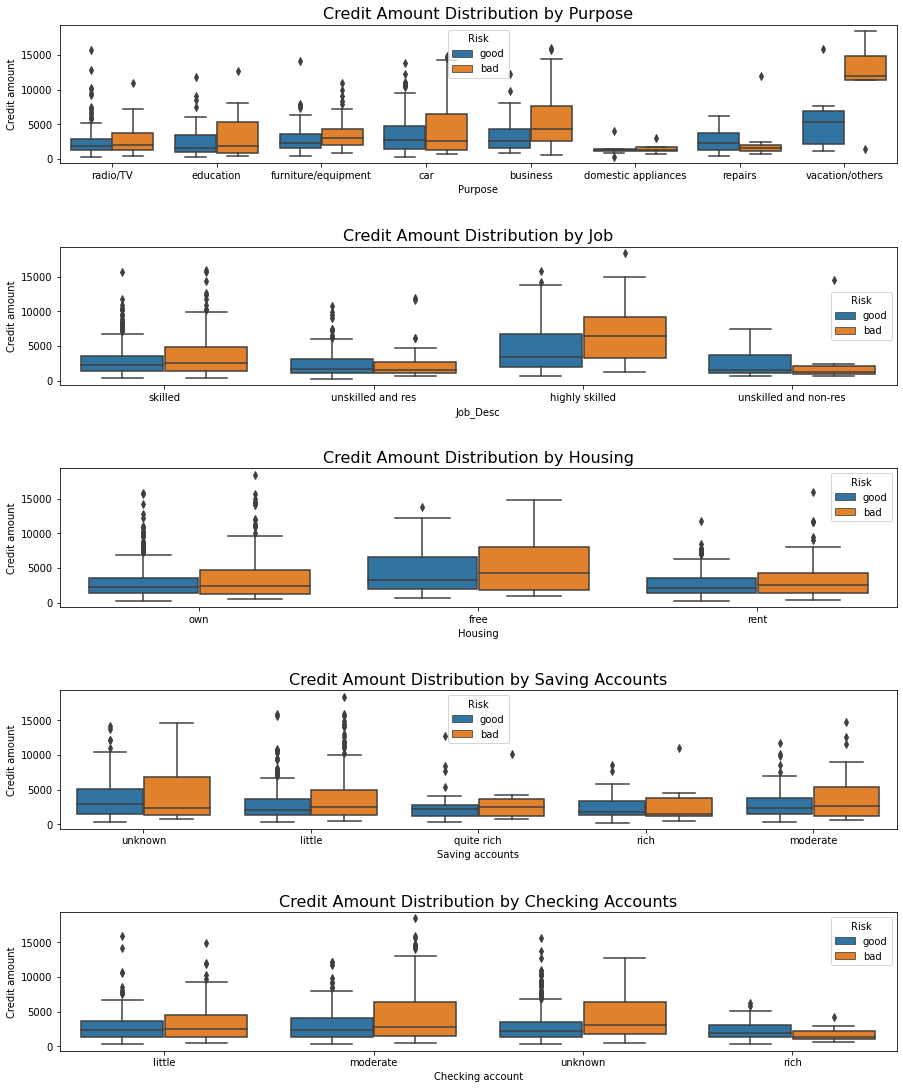

In [36]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15,30))
sns.boxplot(x="Purpose", y="Credit amount", data=df, hue="Risk", ax=ax1)
sns.boxplot(x="Job_Desc", y="Credit amount", data=df, hue="Risk", ax=ax2)
sns.boxplot(x="Housing", y="Credit amount", data=df, hue="Risk", ax=ax3)
sns.boxplot(x="Saving accounts", y="Credit amount", data=df, hue="Risk", ax=ax4)
sns.boxplot(x="Checking account", y="Credit amount", data=df, hue="Risk", ax=ax5)
ax1.set_title("Credit Amount Distribution by Purpose", fontsize=16)
ax2.set_title("Credit Amount Distribution by Job", fontsize=16)
ax3.set_title("Credit Amount Distribution by Housing", fontsize=16)
ax4.set_title("Credit Amount Distribution by Saving Accounts", fontsize=16)
ax5.set_title("Credit Amount Distribution by Checking Accounts", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

In [37]:
#we are interested in to identify bad loans so we'll assign bad risk with 1
r = {"good":0, "bad":1}
df['Risk'] = df['Risk'].map(r)

In [38]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Job_Desc
0,67,male,2,own,unknown,little,1169,6,radio/TV,0,skilled
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,skilled
2,49,male,1,own,little,unknown,2096,12,education,0,unskilled and res
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,skilled
4,53,male,2,free,little,little,4870,24,car,1,skilled
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,0,unskilled and res
996,40,male,3,own,little,little,3857,30,car,0,highly skilled
997,38,male,2,own,little,unknown,804,12,radio/TV,0,skilled
998,23,male,2,free,little,little,1845,45,radio/TV,1,skilled


In [39]:
#Instead of using the raw credit amount as our dependent variable, we need to get the log of these amounts.
df['Log_CA'] = np.log(df['Credit amount'])

In [40]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Job_Desc,Log_CA
0,67,male,2,own,unknown,little,1169,6,radio/TV,0,skilled,7.063904
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,skilled,8.691315
2,49,male,1,own,little,unknown,2096,12,education,0,unskilled and res,7.647786
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,skilled,8.972337
4,53,male,2,free,little,little,4870,24,car,1,skilled,8.490849
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,0,unskilled and res,7.459339
996,40,male,3,own,little,little,3857,30,car,0,highly skilled,8.257645
997,38,male,2,own,little,unknown,804,12,radio/TV,0,skilled,6.689599
998,23,male,2,free,little,little,1845,45,radio/TV,1,skilled,7.520235


In [41]:
pd.options.display.max_columns
pd.set_option('display.max_columns', None)

In [42]:
all_dummies = pd.get_dummies(df[['Age', 'Duration', 'Log_CA', 'Housing','Job_Desc','Sex','Saving accounts','Checking account','Purpose', 'Risk']])
all_dummies

,Age,Duration,Log_CA,Risk,Housing_free,Housing_own,Housing_rent,Job_Desc_highly skilled,Job_Desc_skilled,Job_Desc_unskilled and non-res,Job_Desc_unskilled and res,Sex_female,Sex_male,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_unknown,Checking account_little,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,6,7.063904,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
1,22,48,8.691315,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,49,12,7.647786,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,45,42,8.972337,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,53,24,8.490849,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,12,7.459339,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
996,40,30,8.257645,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
997,38,12,6.689599,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
998,23,45,7.520235,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# Model Building

In [43]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [44]:
X = all_dummies.drop('Risk', axis =1)
y = all_dummies.Risk.values

In [45]:
y.shape[0]

1000

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.isnull().sum()

Age                               0
Duration                          0
Log_CA                            0
Housing_free                      0
Housing_own                       0
Housing_rent                      0
Job_Desc_highly skilled           0
Job_Desc_skilled                  0
Job_Desc_unskilled and non-res    0
Job_Desc_unskilled and res        0
Sex_female                        0
Sex_male                          0
Saving accounts_little            0
Saving accounts_moderate          0
Saving accounts_quite rich        0
Saving accounts_rich              0
Saving accounts_unknown           0
Checking account_little           0
Checking account_moderate         0
Checking account_rich             0
Checking account_unknown          0
Purpose_business                  0
Purpose_car                       0
Purpose_domestic appliances       0
Purpose_education                 0
Purpose_furniture/equipment       0
Purpose_radio/TV                  0
Purpose_repairs             

In [48]:
X_train.shape

(800, 29)

In [49]:
#Here we evaluate on the basis of recall

## LogisticRegression

In [56]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_pred_lr, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report: \n", classification_report(y_test, y_pred_lr))

Accuracy Score:  0.755
Confusion Matrix: 
 [[127  14]
 [ 35  24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       141
           1       0.63      0.41      0.49        59

    accuracy                           0.76       200
   macro avg       0.71      0.65      0.67       200
weighted avg       0.74      0.76      0.74       200



/home/shoaibpc/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Support Vector Machine (SVM)

In [57]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_pred_svc = svm.predict(X_test)
print(accuracy_score(y_pred_svc, y_test))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.715
[[135   6]
 [ 51   8]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       141
           1       0.57      0.14      0.22        59

    accuracy                           0.71       200
   macro avg       0.65      0.55      0.52       200
weighted avg       0.68      0.71      0.65       200



## K - Nearest Neighbors

In [58]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_pred_knn, y_test))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.67
[[118  23]
 [ 43  16]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       141
           1       0.41      0.27      0.33        59

    accuracy                           0.67       200
   macro avg       0.57      0.55      0.55       200
weighted avg       0.64      0.67      0.65       200



## Random Forest Classifier

In [59]:
param_grid_rf = {"max_depth": range(3,10),
                  "max_features": [3,5,7,9,11,13,15,17,20],
                  "min_samples_leaf": [5,10,15,20,25,30],
                  "n_estimators": [3,5,10,25,50,150]}

In [60]:
rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring="recall", verbose=4)
gs_rf.fit(X_train, y_train)

gs_rf.best_params_

Fitting 5 folds for each of 2268 candidates, totalling 11340 fits
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3 .
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3, score=0.020, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3 .
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3 .
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3 .
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3 .
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=3, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=5 .
[CV]  max_depth=3,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=

[CV]  max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_sa

[CV]  max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.021, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=3, min_sa

[CV]  max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.104, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=

[CV]  max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.020, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=3, max_features=5, min_sa

[CV]  max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.020, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=5, min_sa

[CV]  max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.061, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=

[CV]  max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=3, max_features=7, min_sa

[CV]  max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=3, max_features=7, min_sa

[CV]  max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=

[CV]  max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=9, min_sa

[CV]  max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=3, max_features=9, min_sa

[CV]  max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.104, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.122, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=11, min_s

[CV]  max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.041, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=13, min_s

[CV]  max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.122, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=3, max_features=15, min_s

[CV]  max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=3, max_features=17, min_s

[CV]  max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.104, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.104, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=3, max_features=20, min_s

[CV]  max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=3, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=3, max_feature

[CV]  max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.061, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=

[CV]  max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.020, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=4, max_features=3, min_sa

[CV]  max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=4, max_features=3, min_sa

[CV]  max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=

[CV]  max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=4, max_features=5, min_sa

[CV]  max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.020, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=4, max_features=5, min_sa

[CV]  max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.104, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=

[CV]  max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=4, max_features=7, min_sa

[CV]  max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.041, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=4, max_features=7, min_sa

[CV]  max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=

[CV]  max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=9, min_sa

[CV]  max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=4, max_features=9, min_sa

[CV]  max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=4, max_features=11, min_s

[CV]  max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.122, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=13, min_s

[CV]  max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=4, max_features=15, min_s

[CV]  max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.265, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=4, max_features=17, min_s

[CV]  max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.458, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.184, total=   0.1s
[CV] max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.229, total=   0.1s
[CV] max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.1s
[CV] max_depth=4, max_features=20, min_s

[CV]  max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=4, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.354, total=   0.0s
[CV] max_depth=4, max_feature

[CV]  max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.061, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=

[CV]  max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.041, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=5, max_features=3, min_sa

[CV]  max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.021, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=5, max_features=3, min_sa

[CV]  max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.122, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=

[CV]  max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=5, max_features=5, min_sa

[CV]  max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=5, max_features=5, min_sa

[CV]  max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=

[CV]  max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=7, min_sa

[CV]  max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=5, max_features=7, min_sa

[CV]  max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=

[CV]  max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=5, max_features=9, min_sa

[CV]  max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=5, max_features=9, min_sa

[CV]  max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=11, min_s

[CV]  max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=13, min_s

[CV]  max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=5, max_features=15, min_s

[CV]  max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.286, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.1s
[CV] max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=5, max_features=17, min_s

[CV]  max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.458, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.1s
[CV] max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.1s
[CV] max_depth=5, max_features=20, min_s

[CV]  max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.458, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=5, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=

[CV]  max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=6, max_features=3, min_sa

[CV]  max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.020, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.021, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.021, total=   0.0s
[CV] max_depth=6, max_features=3, min_sa

[CV]  max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=

[CV]  max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.104, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=6, max_features=5, min_sa

[CV]  max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.041, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=6, max_features=5, min_sa

[CV]  max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.354, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=

[CV]  max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=6, max_features=7, min_sa

[CV]  max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=6, max_features=7, min_sa

[CV]  max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.479, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=

[CV]  max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=6, max_features=9, min_sa

[CV]  max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=9, min_sa

[CV]  max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.265, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=11, min_s

[CV]  max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=13, min_s

[CV]  max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.458, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=15, min_s

[CV]  max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.245, total=   0.1s
[CV] max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.354, total=   0.1s
[CV] max_depth=6, max_features=17, min_s

[CV]  max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.265, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.1s
[CV] max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.333, total=   0.1s
[CV] max_depth=6, max_features=20, min_s

[CV]  max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.1s
[CV] max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.354, total=   0.1s
[CV] max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=15, n_estimators=25, score=0.333, total=   0.1s
[CV] max_depth=6, max_feature

[CV]  max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=10, score=0.458, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=6, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=6, max_feature

[CV]  max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=

[CV]  max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=7, max_features=3, min_sa

[CV]  max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=7, max_features=3, min_sa

[CV]  max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=

[CV]  max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=7, max_features=5, min_sa

[CV]  max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.021, total=   0.0s
[CV] max_depth=7, max_features=5, min_sa

[CV]  max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=

[CV]  max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=7, min_sa

[CV]  max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.061, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=7, max_features=7, min_sa

[CV]  max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.265, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=

[CV]  max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=7, max_features=9, min_sa

[CV]  max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=7, max_features=9, min_sa

[CV]  max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=11, min_s

[CV]  max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.458, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.333, total=   0.1s
[CV] max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.375, total=   0.1s
[CV] max_depth=7, max_features=13, min_s

[CV]  max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.245, total=   0.1s
[CV] max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.375, total=   0.1s
[CV] max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.396, total=   0.1s
[CV] max_depth=7, max_features=15, min_s

[CV]  max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.1s
[CV] max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=7, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=7, max_features=17, min_s

[CV]  max_depth=7, max_features=17, min_samples_leaf=10, n_estimators=150, score=0.438, total=   0.3s
[CV] max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3, score=0.286, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3, score=0.292, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=7, max_features=17, min_samples_leaf=15, n_estimators=3, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=17, min

[CV]  max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=25, score=0.271, total=   0.1s
[CV] max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=25, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=25, score=0.417, total=   0.1s
[CV] max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=50 
[CV]  max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=50, score=0.184, total=   0.1s
[CV] max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=50 
[CV]  max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=50, score=0.292, total=   0.1s
[CV] max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=50 
[CV]  max_depth=7, max_features=17, min_samples_leaf=20, n_estimators=50, score=0.375, total=   0.1s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=25, score=0.184, total=   0.1s
[CV] max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=7, max_features=17, min_samples_leaf=30, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=25, score=0.204, total=   0.1s
[CV] max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=7, max_features=20, min_samples_leaf=10, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=20, min_samples_leaf=15, n_estimators=150, score=0.438, total=   0.3s
[CV] max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3 
[CV]  max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3, score=0.306, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3 
[CV]  max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3, score=0.208, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3 
[CV]  max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3, score=0.250, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3 
[CV]  max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3, score=0.417, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3 
[CV]  max_depth=7, max_features=20, min_samples_leaf=20, n_estimators=3, score=0.312, total=   0.0s
[CV] max_depth=7, max_features=20, min

[CV]  max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.396, total=   0.1s
[CV] max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=50 
[CV]  max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=50, score=0.204, total=   0.1s
[CV] max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=50 
[CV]  max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=50, score=0.312, total=   0.1s
[CV] max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=50 
[CV]  max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=50, score=0.292, total=   0.1s
[CV] max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=50 
[CV]  max_depth=7, max_features=20, min_samples_leaf=25, n_estimators=50, score=0.354, total=   0.1s
[CV] max_depth=7, max_feature

[CV]  max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=

[CV]  max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.041, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=15, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=8, max_features=3, min_sa

[CV]  max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=3, min_samples_leaf=25, n_estimators=25, score=0.021, total=   0.0s
[CV] max_depth=8, max_features=3, min_sa

[CV]  max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=

[CV]  max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=5, min_sa

[CV]  max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.042, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.061, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.083, total=   0.0s
[CV] max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=5, min_samples_leaf=25, n_estimators=25, score=0.062, total=   0.0s
[CV] max_depth=8, max_features=5, min_sa

[CV]  max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=5, n_estimators=25, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=

[CV]  max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=15, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=7, min_sa

[CV]  max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=7, min_samples_leaf=25, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=8, max_features=7, min_sa

[CV]  max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=5, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=

[CV]  max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=15, n_estimators=25, score=0.271, total=   0.1s
[CV] max_depth=8, max_features=9, min_sa

[CV]  max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=9, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=8, max_features=9, min_sa

[CV]  max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.333, total=   0.1s
[CV] max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=5, n_estimators=25, score=0.375, total=   0.1s
[CV] max_depth=8, max_features=11, min_s

[CV]  max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=15, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=11, min_samples_leaf=25, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.224, total=   0.1s
[CV] max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.1s
[CV] max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=5, n_estimators=25, score=0.292, total=   0.1s
[CV] max_depth=8, max_features=13, min_s

[CV]  max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=10, score=0.479, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=15, n_estimators=25, score=0.354, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=13, min_samples_leaf=25, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.265, total=   0.1s
[CV] max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.375, total=   0.1s
[CV] max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=5, n_estimators=25, score=0.417, total=   0.1s
[CV] max_depth=8, max_features=15, min_s

[CV]  max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=15, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=15, min_samples_leaf=25, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=10, score=0.458, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.265, total=   0.1s
[CV] max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.396, total=   0.1s
[CV] max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=5, n_estimators=25, score=0.438, total=   0.1s
[CV] max_depth=8, max_features=17, min_s

[CV]  max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=10 
[CV]  max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=15, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.292, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=10 
[CV]  max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=25 
[CV]  max_depth=8, max_features=17, min_samples_leaf=25, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=10, score=0.458, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.265, total=   0.1s
[CV] max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=25 
[CV]  max_depth=8, max_features=20, min_samples_leaf=5, n_estimators=25, score=0.396, total=   0.1s
[CV] max_depth=8, max_features=20, min_s

[CV]  max_depth=8, max_features=20, min_samples_leaf=10, n_estimators=150, score=0.458, total=   0.3s
[CV] max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3, score=0.347, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3, score=0.292, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3, score=0.354, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3, score=0.438, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3 
[CV]  max_depth=8, max_features=20, min_samples_leaf=15, n_estimators=3, score=0.458, total=   0.0s
[CV] max_depth=8, max_features=20, min

[CV]  max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=25, score=0.354, total=   0.1s
[CV] max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=25, score=0.417, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=50 
[CV]  max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=50, score=0.163, total=   0.1s
[CV] max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=50 
[CV]  max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=50, score=0.312, total=   0.1s
[CV] max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=50 
[CV]  max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=50, score=0.312, total=   0.1s
[CV] max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=50 
[CV]  max_depth=8, max_features=20, min_samples_leaf=20, n_estimators=50, score=0.292, total=   0.1s
[CV] max_depth=8, max_feature

[CV]  max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=8, max_features=20, min_samples_leaf=30, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=8, max_feature

[CV]  max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=25, score=0.061, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=10, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=9, max_features=3, min_sa

[CV]  max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=20, n_estimators=25, score=0.021, total=   0.0s
[CV] max_depth=9, max_features=3, min_sa

[CV]  max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=3, min_samples_leaf=30, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=9, max_features=3, min_sa

[CV]  max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=10, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=9, max_features=5, min_sa

[CV]  max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=10, score=0.104, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=25, score=0.082, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=20, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=9, max_features=5, min_sa

[CV]  max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=10, score=0.021, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=10, score=0.000, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=25, score=0.061, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=5, min_samples_leaf=30, n_estimators=25, score=0.021, total=   0.0s
[CV] max_depth=9, max_features=5, min_sa

[CV]  max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=10, n_estimators=25, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=7, min_sa

[CV]  max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=10, score=0.146, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=20, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=9, max_features=7, min_sa

[CV]  max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=10, score=0.083, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=10, score=0.062, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=25, score=0.104, total=   0.0s
[CV] max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=7, min_samples_leaf=30, n_estimators=25, score=0.042, total=   0.0s
[CV] max_depth=9, max_features=7, min_sa

[CV]  max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=10, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=9, min_sa

[CV]  max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=20, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=9, max_features=9, min_sa

[CV]  max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=9, min_samples_leaf=30, n_estimators=25, score=0.146, total=   0.0s
[CV] max_depth=9, max_features=9, min_sa

[CV]  max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=10, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=10, score=0.125, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=25, score=0.224, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=25, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=20, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=25, score=0.143, total=   0.1s
[CV] max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=25, score=0.125, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=11, min_samples_leaf=30, n_estimators=25, score=0.167, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=10, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=25, score=0.143, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=20, n_estimators=25, score=0.312, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=10, score=0.167, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=25, score=0.102, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=25, score=0.208, total=   0.0s
[CV] max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=13, min_samples_leaf=30, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=25, score=0.292, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=10, n_estimators=25, score=0.312, total=   0.1s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=25, score=0.184, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=20, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=10, score=0.188, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=10, score=0.271, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=25, score=0.163, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=25, score=0.188, total=   0.0s
[CV] max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=15, min_samples_leaf=30, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=10, score=0.479, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=25, score=0.245, total=   0.1s
[CV] max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=25, score=0.354, total=   0.1s
[CV] max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=10, n_estimators=25, score=0.375, total=   0.1s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=10, score=0.312, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=10, score=0.417, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=25, score=0.245, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=25, score=0.292, total=   0.1s
[CV] max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=20, n_estimators=25, score=0.292, total=   0.1s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=10, score=0.229, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=10, score=0.208, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=10, score=0.396, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=17, min_samples_leaf=30, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=10, score=0.333, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=10 
[CV]  max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=10, score=0.438, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=25, score=0.245, total=   0.1s
[CV] max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=25, score=0.354, total=   0.1s
[CV] max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=10, n_estimators=25, score=0.354, total=   0.1s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=10, score=0.375, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=10 
[CV]  max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=10, score=0.500, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=25, score=0.204, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=25, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=20, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=9, max_feature

[CV]  max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=10, score=0.250, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=10 
[CV]  max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=10, score=0.354, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=25, score=0.327, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=25, score=0.229, total=   0.0s
[CV] max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=25 
[CV]  max_depth=9, max_features=20, min_samples_leaf=30, n_estimators=25, score=0.271, total=   0.0s
[CV] max_depth=9, max_feature

[Parallel(n_jobs=1)]: Done 11340 out of 11340 | elapsed: 13.6min finished


{'max_depth': 7, 'max_features': 20, 'min_samples_leaf': 5, 'n_estimators': 3}

In [63]:
rf = RandomForestClassifier(max_depth=7, max_features=20, min_samples_leaf=5, n_estimators=3)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.74
[[121  20]
 [ 32  27]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       141
           1       0.57      0.46      0.51        59

    accuracy                           0.74       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.73      0.74      0.73       200



## Gaussian Naive Bayes

In [64]:
nb = GaussianNB()
model = nb.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)
print(accuracy_score(y_pred_nb, y_test))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.655
[[97 44]
 [25 34]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       141
           1       0.44      0.58      0.50        59

    accuracy                           0.66       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.69      0.66      0.67       200



In [65]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, y_train) * 100, 2)
print (acc_gnb)

70.12


### With gausian model we got the best recall

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

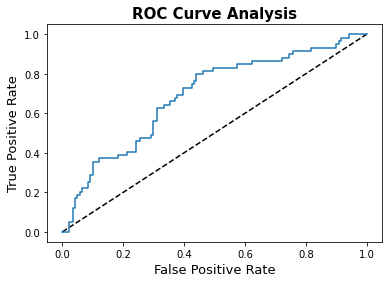

In [67]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()